In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = False))

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 2
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 100, Accuracy: 0.8580246913580247, Loss: 0.5766860114203559
Checkpoint 200, Accuracy: 0.8580246913580247, Loss: 0.5662124068648727
Checkpoint 300, Accuracy: 0.8641975308641975, Loss: 0.5668804733841507
Checkpoint 400, Accuracy: 0.8580246913580247, Loss: 0.5680497840598777
Checkpoint 500, Accuracy: 0.8641975308641975, Loss: 0.5671815872192383


In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.3195538 ]
 [0.41804984]
 [0.2623964 ]]
[1. 0. 0.] <-> [[0.6473071 ]
 [0.22051322]
 [0.13217968]]
[1. 0. 0.] <-> [[0.7907343 ]
 [0.13086411]
 [0.0784016 ]]
[1. 0. 0.] <-> [[0.91608673]
 [0.05265269]
 [0.0312606 ]]
[1. 0. 0.] <-> [[0.90966225]
 [0.05661871]
 [0.03371903]]
[1. 0. 0.] <-> [[0.86376774]
 [0.08516788]
 [0.05106442]]
[0. 1. 0.] <-> [[0.6865198 ]
 [0.1960657 ]
 [0.11741452]]
[1. 0. 0.] <-> [[0.5075335 ]
 [0.3068048 ]
 [0.18566169]]
[1. 0. 0.] <-> [[0.29730067]
 [0.43045667]
 [0.27224267]]
[0. 1. 0.] <-> [[0.02452079]
 [0.43713742]
 [0.5383418 ]]
[0. 0. 1.] <-> [[0.02982125]
 [0.45590752]
 [0.5142712 ]]
[0. 1. 0.] <-> [[0.03064499]
 [0.45834336]
 [0.51101166]]
[1. 0. 0.] <-> [[0.89521974]
 [0.06557196]
 [0.03920833]]
[1. 0. 0.] <-> [[0.8240603 ]
 [0.10999632]
 [0.06594332]]
[1. 0. 0.] <-> [[0.28793198]
 [0.43559918]
 [0.27646878]]
[0. 1. 0.] <-> [[0.3221772]
 [0.4165711]
 [0.2612517]]
[0. 0. 1.] <-> [[0.1521108 ]
 [0.49995744]
 [0.34793177]]
[0. 1. 0.] <-> [[

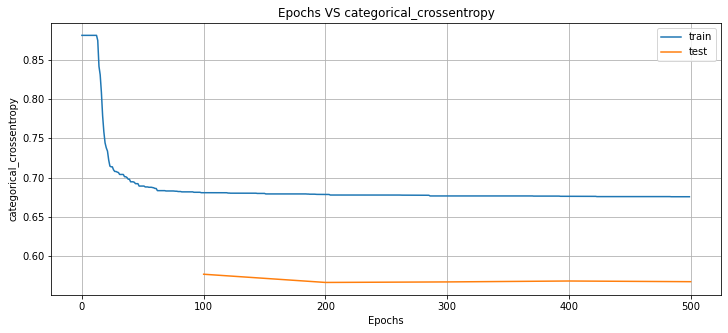

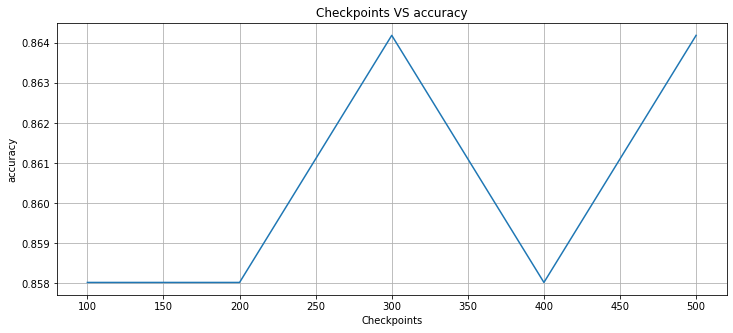

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [12]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8580246913580247, 'mean_square_error': 2.803577773851641, 'categorical_crossentropy': 0.5766860114203559, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 12, 'tn_hit': 16, 'fn_hit': 4}, 1: {'tp_hit': 2, 'fp_hit': 7, 'tn_hit': 86, 'fn_hit': 13}, 2: {'tp_hit': 7, 'fp_hit': 4, 'tn_hit': 91, 'fn_hit': 6}}, 'checkpoint': 100} 


{'accuracy': 0.8580246913580247, 'mean_square_error': 2.8912489554897634, 'categorical_crossentropy': 0.5662124068648727, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 12, 'tn_hit': 16, 'fn_hit': 4}, 1: {'tp_hit': 2, 'fp_hit': 7, 'tn_hit': 86, 'fn_hit': 13}, 2: {'tp_hit': 7, 'fp_hit': 4, 'tn_hit': 91, 'fn_hit': 6}}, 'checkpoint': 200} 


{'accuracy': 0.8641975308641975, 'mean_square_error': 2.8459217915405266, 'categorical_crossentropy': 0.5668804733841507, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 13, 'tn_hit': 15, 'fn_hit': 4}, 1: {'tp_hit': 4, 'fp_hit': 7, 'tn_hit': 86, 'fn_hit': 11}, 2: {'tp_hit': 6, 'fp_hit': 2, 'tn_hit': 93, 'fn_hi

In [13]:
print(model)

Layer 1
Neuron 0: weights:
[[ 0.912639 ]
 [-0.7202761]
 [ 3.       ]
 [-1.223818 ]
 [-1.3737619]]
 bias: [-1.9125872]

Neuron 1: weights:
[[-1.4731274 ]
 [ 1.8929151 ]
 [-1.0136855 ]
 [ 0.21283236]
 [ 0.46212813]]
 bias: [1.8341893]

Neuron 2: weights:
[[ 1.6726806 ]
 [-0.18088654]
 [-0.6321987 ]
 [-0.31150544]
 [-1.375927  ]]
 bias: [0.84077823]

Neuron 3: weights:
[[-0.6026057 ]
 [-0.97526383]
 [ 1.1531434 ]
 [ 0.55627066]
 [-0.98100567]]
 bias: [0.6686507]

$
Layer 2
Neuron 0: weights:
[[-2.0901072]
 [-1.2870957]
 [ 2.3436496]
 [ 1.8133249]]
 bias: [-0.12371627]

Neuron 1: weights:
[[-0.48247257]
 [-0.66927636]
 [-1.1524991 ]
 [-0.41261786]]
 bias: [1.7925701]

Neuron 2: weights:
[[ 2.5898643 ]
 [ 0.17875588]
 [-0.7088019 ]
 [ 0.281116  ]]
 bias: [-0.61546826]

$

